In [13]:
import gpxpy
import gpxpy.gpx

import pandas as pd

import matplotlib.pyplot as plt

In [14]:
def read_gpx_into_df(filename):
    with open(filename, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)
        
    points = []
    for segment in gpx.tracks[0].segments:
        for previous_point, point in zip(segment.points, segment.points[1:]):
            distance = point.distance_2d(previous_point)
            points.append({
                'time': point.time,
                'lat': point.latitude,
                'lng': point.longitude,
                'elevation': point.elevation,
                'distance': distance,
            })

    df = pd.DataFrame.from_records(points)
    
    df['time']  = pd.to_datetime(df['time'], format='%d/%m/%y %H:%M:%S')
    
    return df

In [4]:
part_1_df = read_gpx_into_df('../data/craze_ultra_2023/Evgeny_Arbatov_2023-09-30_06-50-34.GPX')
part_2_df = read_gpx_into_df('../data/craze_ultra_2023/Evgeny_Arbatov_2023-09-30_14-12-50.GPX')

In [5]:
part_1_df.distance.cumsum().iloc[-1] / 1000.0

54.137261397701515

In [6]:
part_2_df.distance.cumsum().iloc[-1] / 1000.0

54.25635748214277

In [9]:
route_df = read_gpx_into_df('../data/craze_ultra_2023/RouteBstd.gpx')
route_df.distance.cumsum().iloc[-1] / 1000.0

102.13986585405551

In [11]:
combined_recording_df = pd.concat([part_1_df, part_2_df])
combined_recording_df.distance.cumsum().iloc[-1] / 1000.0

108.39361887984435

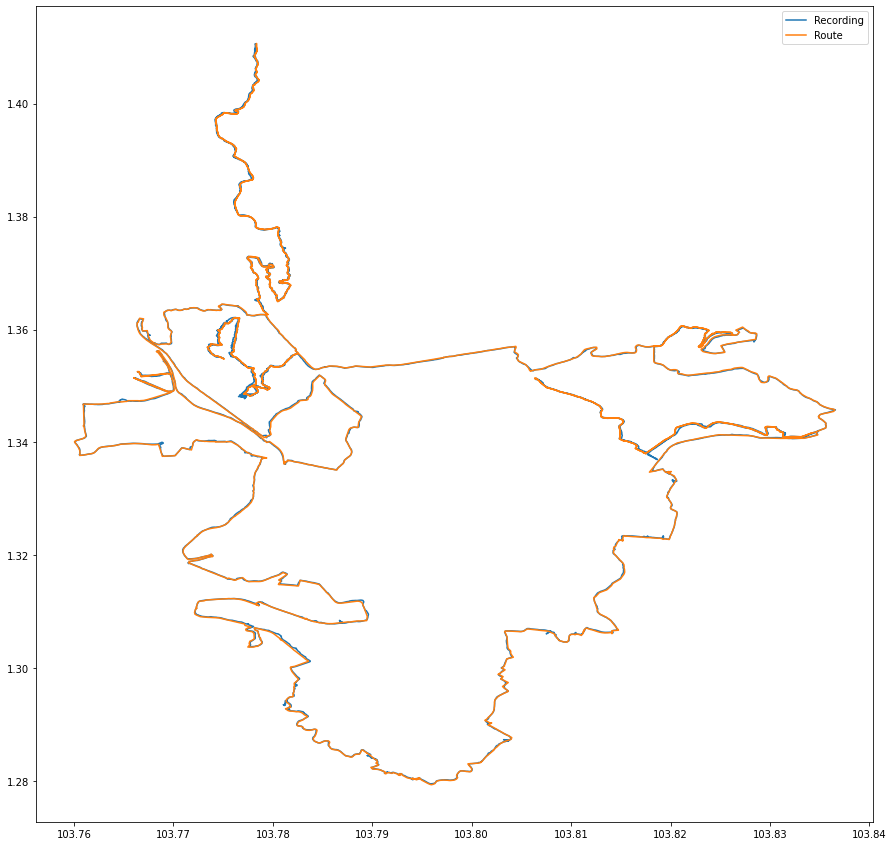

In [15]:
plt.figure(figsize=(15,15))
plt.plot(combined_recording_df['lng'], combined_recording_df['lat'], label='Recording')
plt.plot(route_df['lng'], route_df['lat'], label='Route')
plt.legend()